In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

source = '/Users/kiii_rey/Documents/Kirey/Data science learning/Mini project 2/hotel_bookings_data.csv'

df = pd.read_csv(source)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


<b> Tugas 1 <b>

1. Download file "Dataset"
2. Mengatasi data null (Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode yang tepat.)
3. Mengganti value yang tidak sesuai (Hint: Perhatikan kolom "meal")4. 
4. Membuang data yang tidak diperlukan (Hint: Perhatikan total jumlah tamu untuk setiap pemesanan)

In [20]:
#Basic Dataset Information

print('Shape of Data :', df.shape)
print('Number of Rows :', df.shape[0])
print('Number of Columns :', df.shape[1])

Shape of Data : (119390, 29)
Number of Rows : 119390
Number of Columns : 29


In [21]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [22]:
#Info of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<b>Observations:</b><br>The dataset consists of `29 columns` and `119,390 rows` of data.<br>There are 3 types of data: `float64(4), int64(16), object(9)`.<br>There are some missing values in the following columns:
- `company` with a total `94%` null values, amounting to `112,593 rows`.
- `agent` with a total of `13%` null values, amounting to `16,340 rows`.
- `city` with a total of `0.4%` null values, amounting to `488 rows`.
- `children` with a total of `0.003%` null values, amounting to `4 rows`.

In [23]:
#Data Cleansing/Preprocessing

#Handling Duplicate Rows
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values)).head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
78101,City Hotel,0,0,2017,December,40,2,0,2,1,...,2,No Deposit,NaN,NaN,0,Family,145.0,0,0,Check-Out
78104,City Hotel,0,0,2017,December,40,2,0,2,1,...,2,No Deposit,NaN,NaN,0,Family,145.0,0,0,Check-Out
78105,City Hotel,0,0,2017,December,40,2,0,2,1,...,2,No Deposit,NaN,NaN,0,Family,145.0,0,0,Check-Out
78403,City Hotel,0,0,2017,December,41,6,0,3,1,...,0,No Deposit,NaN,NaN,0,Personal,130.0,0,0,Check-Out
78407,City Hotel,0,0,2017,December,41,6,0,3,1,...,0,No Deposit,NaN,NaN,0,Personal,130.0,0,0,Check-Out
78385,City Hotel,0,0,2017,December,41,7,0,2,1,...,0,No Deposit,1.0,NaN,0,Family,119.0,0,0,Check-Out
78401,City Hotel,0,0,2017,December,41,7,0,2,1,...,0,No Deposit,1.0,NaN,0,Family,119.0,0,0,Check-Out
78404,City Hotel,0,0,2017,December,41,7,0,2,1,...,0,No Deposit,1.0,NaN,0,Family,119.0,0,0,Check-Out
78402,City Hotel,0,0,2017,December,41,7,0,2,2,...,0,No Deposit,1.0,NaN,0,Family,138.0,0,0,Check-Out
78405,City Hotel,0,0,2017,December,41,7,0,2,2,...,0,No Deposit,1.0,NaN,0,Family,138.0,0,0,Check-Out


In [24]:
print('Number of duplicates rows :', df.duplicated().sum())

Number of duplicates rows : 33261


In [25]:
print(f'Data Frame Dimension Before Duplicate Removal: {df.shape}')
df = df.drop_duplicates().reset_index(drop=True)
print(f'Data Frame Dimension After Duplicate Removal: {df.shape}')

Data Frame Dimension Before Duplicate Removal: (119390, 29)
Data Frame Dimension After Duplicate Removal: (86129, 29)


<b>Observations:<b>
- This dataset has many duplicates, totaling 33,261 rows.
- Before handling duplicate rows, the dataset had 119,390 rows.
- After handling duplicate rows, the dataset is left with 86,129 rows.

In [26]:
#Handling Missing Values

#The Number of NULL entries in each column
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_weekdays_nights              0
adults                                0
children                              4
babies                                0
meal                                  0
city                                450
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
deposit_type                          0
agent                             11941
company                           81019
days_in_waiting_list                  0
customer_type                         0


In [27]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc['Data Type'] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=['Total Null Values', 'Percentage'], ascending=False, inplace=True)

print(nvc)

Missing values status: True
                                Total Null Values  Percentage Data Type
company                                     81019   94.067039    object
agent                                       11941   13.864088     int64
city                                          450    0.522472     int64
children                                        4    0.004644   float64
hotel                                           0    0.000000    object
required_car_parking_spaces                     0    0.000000     int64
adr                                             0    0.000000     int64
customer_type                                   0    0.000000     int64
days_in_waiting_list                            0    0.000000    object
deposit_type                                    0    0.000000     int64
booking_changes                                 0    0.000000     int64
previous_bookings_not_canceled                  0    0.000000     int64
previous_cancellations              

In [28]:
missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', '', ' ', '-1', -1]
for i in df.columns:
    dmmy_col = df[i].apply(lambda x : str(x).strip())
    isnan = dmmy_col.isin(missing_values).any()
    miss = np.unique(dmmy_col[dmmy_col.isin(missing_values)].values)
    if isnan :
        print('{} = {} - {}'.format(i, isnan, miss))

children = True - ['nan']
city = True - ['nan']
agent = True - ['nan']
company = True - ['nan']


<Figure size 1000x600 with 0 Axes>

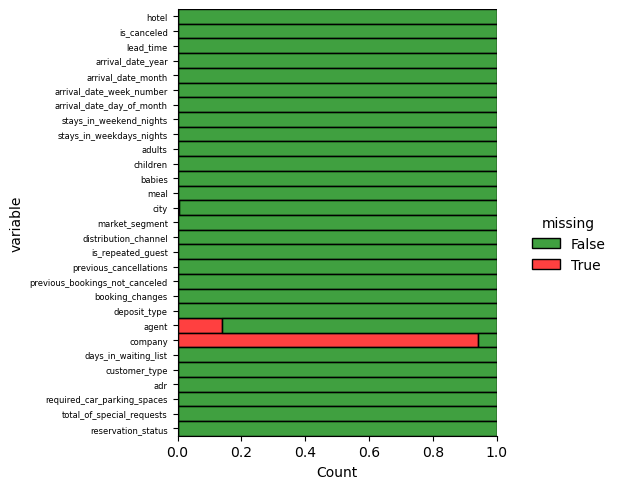

In [31]:
import seaborn as sns

plt.figure(figsize=(10,6))

dms = sns.displot(
    data=df.isna().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    aspect=1.25,
    palette = ['green','red']
)

dms.set_yticklabels(size = 6)

In [32]:
#filling zero value in the company because no company is involved
df['company'] = df['company'].fillna(0)
#filling zero value in the agent because no agent is involved
df['agent'] = df['agent'].fillna(0)
#filling zero rating on children is probably because the customer has no children
df['children'] = df['children'].fillna(0)
#filling 'unknown' for unavailable city
df['city'] = df['city'].fillna('unknown')

<b>Observations:</b><br>The dataset consists of `29 columns` and `119,390 rows` of data.<br>There are 3 types of data: `float64(4), int64(16), object(9)`.<br>There are some missing values in the following columns:
- `company` with a total `94%` null values, amounting to `112,593 rows`.<br>
Filling zero values in the company column since no company is involved.
- `agent` with a total of `13%` null values, amounting to `16,340 rows`.<br>
Filling zero values in the agent column since no agent is involved.
- `city` with a total of `0.4%` null values, amounting to `488 rows`.<br>
Filling 'unknown' for unavailable city entries.
- `children` with a total of `0.003%` null values, amounting to `4 rows`.<br>
Filling zero values for children, as it is likely that the customers have no children.

In [33]:
#Number of NULL entries after cleaning
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [34]:
#Data type information

print('Data type before correction:\n')
df.info()

Data type before correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86129 entries, 0 to 86128
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  float64
 11  babies                          86129 non-null  int64  
 12  me

In [35]:
#Change the some column data type
#Change the data type of `float64` which had null before, `children`, `agent', and `company' to `int64`

df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [36]:
print('Data type after correction:\n')
df.info()

Data type after correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86129 entries, 0 to 86128
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  int64  
 11  babies                          86129 non-null  int64  
 12  mea

In [37]:
#Number of NULL entries after cleaning
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [38]:
#Handling Invalid Values

#Check for the unique values in the data.

for x in df.columns :
    unq = list(df[x].unique())
    unq.sort()
    
    print (f'===== {x} =====')
    if len(unq) >= 13:
        prt = list(unq[:12])+['.....']
        print (f'{prt}')
    else:
        print (f'{unq}')
    print()

===== hotel =====
['City Hotel', 'Resort Hotel']

===== is_canceled =====
[0, 1]

===== lead_time =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '.....']

===== arrival_date_year =====
[2017, 2018, 2019]

===== arrival_date_month =====
['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']

===== arrival_date_week_number =====
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '.....']

===== arrival_date_day_of_month =====
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '.....']

===== stays_in_weekend_nights =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, '.....']

===== stays_in_weekdays_nights =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '.....']

===== adults =====
[0, 1, 2, 3, 4, 5, 6, 10, 20, 26, 27, 40, '.....']

===== children =====
[0, 1, 2, 3, 10]

===== babies =====
[0, 1, 2, 9, 10]

===== meal =====
['Breakfast', 'Dinner', 'Full Board', 'No Meal', 'Undefined']

===== city =====
['Kabupaten Aceh Jaya', 'Kabupaten Bandung', 'Kabupa

In [39]:
#Replacing incorrect values in `meal` column
#Changing `Undefined` to `No Meal`

df['meal'] = df['meal'].replace(['Undefimed'],'No Meal')

In [40]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [41]:
#Drop Unnecessary Data
#It can be seen that the data in the hotel is strongly influenced by the customer's condition. So we need to ensure the total number of guests/customers on each order
#1. Number of Customers/Guests
#2. Total duration of the night

print('======= Before Drop Unnecessary Date =======')
print('Total Data = {} rows'.format(df.shape[0]))

#Number of Customers / Guests (adults/children/babies)
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('No Customers / Guests = {} rows'.format(df[df['total_guests'] == 0].shape[0]))

#Number of duration of the nights (weekend/weekdays)
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights'] + df['babies']
print('No Duration of Stay = {} rows'.format(df[df['stay_duration'] == 0].shape[0]))

print('======= After Drop Unnecessary Date =======')
#pick the necessary date
df_final = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)]
print('Total Data = {} rows'.format(df_final.shape[0]))

======= Before Drop Unnecessary Date =======
Total Data = 86129 rows
No Customers / Guests = 165 rows
No Duration of Stay = 640 rows
======= After Drop Unnecessary Date =======
Total Data = 85383 rows
